In [1]:
import pandas as pd
import numpy as np
import os

In [ ]:
# Use this script to generate a scv that merges the data from all CSVs

#used for llava captioning and synthetic data generation

# WAYMO LLAVA


In [16]:
PATH= "../waymo_open_data/"
if os.path.exists(PATH):
    files = os.listdir(PATH)
    
df_list = []
file_names = []
for f in files:
    if f.endswith(".csv"):
        fname = f.split(".")[0]
        if len(fname.split("_"))==4 and fname.split("_")[1]=="captions":
            file_names = fname.split("_")[:-1]
            df_list.append(pd.read_csv(PATH+f))
            

In [17]:
print(df_list)
print(file_names)

[                                content_name     context_frame  camera_id  \
0     10023947602400723454_1120_000_1140_000  1552440213362519          1   
1     10023947602400723454_1120_000_1140_000  1552440213362519          2   
2     10023947602400723454_1120_000_1140_000  1552440213562524          0   
3     10023947602400723454_1120_000_1140_000  1552440213562524          1   
4     10023947602400723454_1120_000_1140_000  1552440213562524          2   
...                                      ...               ...        ...   
3947     990914685337955114_980_000_1000_000  1557853474112249          2   
3948     990914685337955114_980_000_1000_000  1557853477922791          0   
3949     990914685337955114_980_000_1000_000  1557853477922791          1   
3950     990914685337955114_980_000_1000_000  1557853477922791          2   
3951     990914685337955114_980_000_1000_000  1557853478322360          0   

                                                caption  
0      This imag

In [18]:
merged_df = pd.concat(df_list, axis=0)
merged_df.to_csv(PATH+"{}_{}_{}.csv".format(file_names[0],file_names[1],file_names[2]), index=False)

In [19]:
df = pd.read_csv(PATH+"{}_{}_{}.csv".format(file_names[0],file_names[1],file_names[2]))
print(len(df))

39618


# BDD LLAVA



In [5]:
PATH= "../bdd100k/"
if os.path.exists(PATH):
    files = os.listdir(PATH)
    
df_list = []
file_names = []
for f in files:
    if f.endswith(".csv"):
        fname = f.split(".")[0]
        if len(fname.split("_"))==4 and fname.split("_")[1]=="captions":
            file_names = fname.split("_")[:-1]
            df_list.append(pd.read_csv(PATH+f))

merged_df = pd.concat(df_list, axis=0)
merged_df.to_csv(PATH+"{}_{}_{}.csv".format(file_names[0],file_names[1],file_names[2]), index=False)
df = pd.read_csv(PATH+"{}_{}_{}.csv".format(file_names[0],file_names[1],file_names[2]))
print(len(df))

7000


In [6]:
df = pd.read_csv(PATH+"{}_{}_{}.csv".format(file_names[0],file_names[1],file_names[2]))
print(len(df))

7000


# CARLA LLAVA

In [4]:
PATH= "../carla/"
if os.path.exists(PATH):
    files = os.listdir(PATH)
    
df_list = []
file_names = []
for f in files:
    if f.endswith(".csv"):
        fname = f.split(".")[0]
        if len(fname.split("_"))==4 and fname.split("_")[1]=="captions":
            file_names = fname.split("_")[:-1]
            df_list.append(pd.read_csv(PATH+f))

merged_df = pd.concat(df_list, axis=0)
merged_df.to_csv(PATH+"{}_{}_{}.csv".format(file_names[0],file_names[1],file_names[2]), index=False)
df = pd.read_csv(PATH+"{}_{}_{}.csv".format(file_names[0],file_names[1],file_names[2]))
print(len(df))

14340


In [5]:
df = pd.read_csv(PATH+"{}_{}_{}.csv".format(file_names[0],file_names[1],file_names[2]))
print(len(df))

14340


# WAYMO SYNTH


In [10]:
PATH= "/store/harsh/data/waymo_synthetic_ft/"
if os.path.exists(PATH):
    files = os.listdir(PATH)
    
df_list = []
file_names = []
for f in files:
    if f.endswith(".csv"):
        fname = f.split(".")[0]
        if len(fname.split("_"))==3 and fname.split("_")[0]=="metadata":
            file_names = fname.split("_")[:-1]
            df_list.append(pd.read_csv(PATH+f))

merged_df = pd.concat(df_list, axis=0)
merged_df.to_csv(PATH+"{}_{}.csv".format(file_names[0],file_names[1]), index=False)

In [11]:
df = pd.read_csv(PATH+"{}_{}.csv".format(file_names[0],file_names[1]))
print(len(df))

59161


In [12]:
# Merge text files to one text file ending .txt

PATH= "/store/harsh/data/waymo_synthetic_ft/"
if os.path.exists(PATH):
    files = os.listdir(PATH)
lines = []
file_names = []
for f in files:
        if f.endswith(".txt"):
            with open(PATH+f, "r") as file:
                fname = f.split(".")[0]
                if len(fname.split("_"))==3 and fname.split("_")[0]=="filenames":
                    lines.append(file.readlines())
    
with open(PATH+"filenames_seg.txt", "w") as f:
    for lines in lines:
        f.writelines(lines)
        

In [13]:
with open(PATH+"filenames_seg.txt", "r") as f:
    lines = f.readlines()
    print(len(lines))

59158


# BDD SYNTH

In [11]:
PATH= "/store/harsh/data/bdd_synthetic_ft_rct/"
if os.path.exists(PATH):
    files = os.listdir(PATH)
    
df_list = []
file_names = []
for f in files:
    if f.endswith(".csv"):
        fname = f.split(".")[0]
        if len(fname.split("_"))==3 and fname.split("_")[0]=="metadata":
            file_names = fname.split("_")[:-1]
            df_list.append(pd.read_csv(PATH+f))

merged_df = pd.concat(df_list, axis=0)
merged_df.to_csv(PATH+"{}_{}.csv".format(file_names[0],file_names[1]), index=False)

In [12]:
df = pd.read_csv(PATH+"{}_{}.csv".format(file_names[0],file_names[1]))
print(len(df))

24000


In [13]:
# Merge text files to one text file ending .txt

PATH= "/store/harsh/data/bdd_synthetic_ft_rct/"
if os.path.exists(PATH):
    files = os.listdir(PATH)
lines = []
file_names = []
for f in files:
        if f.endswith(".txt"):
            with open(PATH+f, "r") as file:
                fname = f.split(".")[0]
                if len(fname.split("_"))==3 and fname.split("_")[0]=="filenames":
                    lines.append(file.readlines())
    
with open(PATH+"filenames_seg.txt", "w") as f:
    for lines in lines:
        f.writelines(lines)
        

In [14]:
with open(PATH+"filenames_seg.txt", "r") as f:
    lines = f.readlines()
    print(len(lines))

24000


In [14]:
print(lines[0])

1067d00e-00000000_0_0



In [ ]:
# Remove the entry from 

# Change the files from .npy to .png for masks to save space


In [4]:
PATH = "/store/harsh/data/waymo_synthetic/"
final_files = []
with open(PATH+"filenames_seg.txt", "r") as f:
    lines = f.readlines()
    print(len(lines))
    for line in lines:
        line = line.strip()
        if os.path.exists(PATH+"/mask/"+line+".npy"):
            final_files.append(PATH+"/mask/"+line+".npy")
        else:
            print("The file does not exist")

print(len(final_files))


10000
10000


In [7]:
from PIL import Image
# Load the .npy files and save them as PIL image. png files

for path in final_files:
    mask = np.load(path)
    mask = mask.astype(np.uint8).squeeze()
    mask = Image.fromarray(mask)
    mask.save(path.replace(".npy",".png"))
    # delete .npy file
    os.remove(path)
    

In [ ]:
for path in final_files:
    # delete .npy file
    os.remove(path)

In [8]:
# Final check for all files
PATH = "/store/harsh/data/waymo_synthetic/"
final_files_png = []
with open(PATH+"filenames_seg.txt", "r") as f:
    lines = f.readlines()
    print(len(lines))
    for line in lines:
        line = line.strip()
        if os.path.exists(PATH+"/mask/"+line+".png"):
            final_files_png.append(PATH+"/mask/"+line+".png")
        else:
            print("The file does not exist")

print(len(final_files_png))


10000
10000


# Test

In [4]:
# Test the dataloadedr and masks for carla
import omegaconf
import sys
import tqdm
from matplotlib import pyplot as plt
from PIL import Image
sys.path.append('../')
from carla.data_loader import CARLADataset
config_file_name = 'carla_config.yaml'
config = omegaconf.OmegaConf.load(config_file_name)
dataset = CARLADataset(config, image_meta_data=True)

for j in range(len(dataset)):
    img,_  , _,obj_mask,meta = dataset[j]
    
    if obj_mask.max() == 27:
        print("Image {i}".format(i=j))
        print("out of bounds in the image")
        print(meta)
        
        
        meta = dataset._data_list[j]
        object_masks = np.array(Image.open(meta['mask_path'])).astype(np.uint8)
        image = np.array(Image.open(meta['file_name'])).astype(np.uint8)
        plt.imshow(image)
        plt.show()
        plt.imshow(object_masks)
        plt.show()
        plt.imshow(object_masks==27)
        plt.show()
   

/store/harsh/carla_data_neat/expert/train_routes_weathers_02_05_01_12_25
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_04_22_05_24
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_05_00_46_25
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_05_01_38_28
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_05_00_29_43
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_05_00_12_17
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_05_04_53_40
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_04_22_25_37
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_05_03_18_10
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_05_04_37_11
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_04_21_43_56
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_04_23_51_49
/store/harsh/carla_data_neat/expert/train_routes_weathers_02_05_01_55_08
/store/harsh/carla_data_neat/expert/train_routes_we

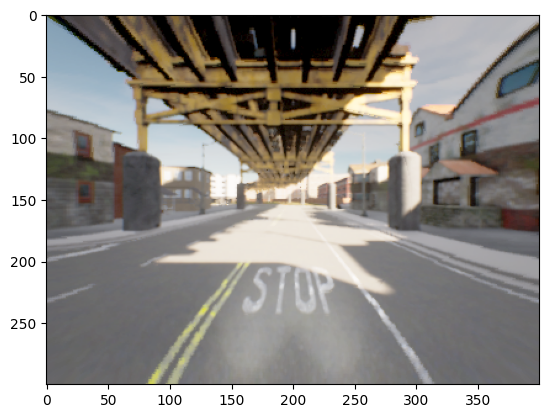

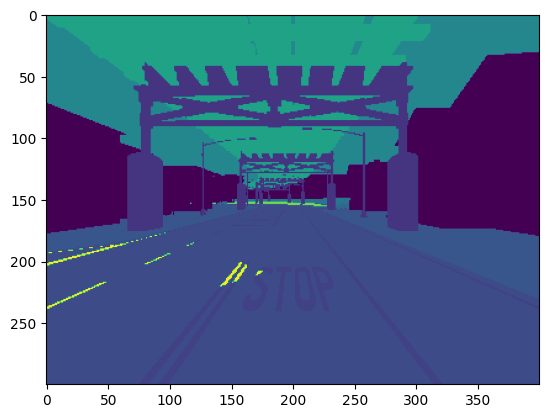

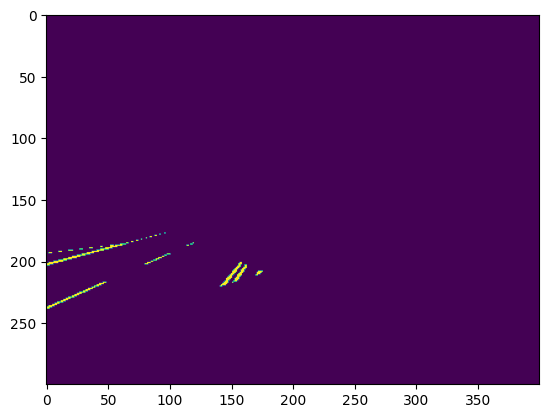